In [ ]:
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow import keras
from tensorflow.keras import layers
import keras.layers
import cv2
import os
from sklearn.model_selection import train_test_split
# from skimage.io import imread

In [ ]:
#initializing the cnn
model=Sequential()

In [ ]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Creating training set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Multi_class_classification/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# Creating the Test set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Multi_class_classification/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 550 images belonging to 4 classes.
Found 67 images belonging to 4 classes.


In [ ]:
training_set.class_indices

{'earVentilationTube': 0, 'normal': 1, 'otitisexterna': 2, 'tympanoskleros': 3}

In [ ]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
inputs = keras.Input((64, 64, 3))
x = keras.layers.Conv2D(filters = 256, kernel_size = 2, activation = 'relu', padding = 'same')(inputs)
x = keras.layers.Conv2D(filters = 128, kernel_size = 2, activation = 'relu', padding = 'same')(x)
x = keras.layers.Conv2D(filters = 128, kernel_size = 2, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5, input_shape = (2,2))(x)
x = keras.layers.Conv2D(filters = 64, kernel_size = 2, activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5, input_shape = (2,2))(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(4, activation = 'softmax')(x)

model = keras.Model(inputs = inputs, outputs = output)

In [ ]:
model.compile(
    loss = keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate = 0.001),
    metrics=["accuracy"]
)

In [ ]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 256)       3328      
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 128)       131200    
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 128)       65664     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 128)       0         
                                                           

In [ ]:
history = model.fit(training_set , epochs = 90 , validation_data=(test_set))
# in 200 epochs we should get good accuracy

Epoch 1/90
18/18 [==============================] - 107s 6s/step - loss: 0.6296 - accuracy: 0.8436 - val_loss: 0.9918 - val_accuracy: 0.8060
Epoch 2/90
18/18 [==============================] - 90s 5s/step - loss: 0.5898 - accuracy: 0.8727 - val_loss: 0.8668 - val_accuracy: 0.8060
Epoch 3/90
18/18 [==============================] - 88s 5s/step - loss: 0.5253 - accuracy: 0.8727 - val_loss: 0.7094 - val_accuracy: 0.8060
Epoch 4/90
18/18 [==============================] - 88s 5s/step - loss: 0.5190 - accuracy: 0.8727 - val_loss: 0.7114 - val_accuracy: 0.8060
Epoch 5/90
18/18 [==============================] - 87s 5s/step - loss: 0.5295 - accuracy: 0.8727 - val_loss: 0.7047 - val_accuracy: 0.8060
Epoch 6/90
18/18 [==============================] - 87s 5s/step - loss: 0.5249 - accuracy: 0.8727 - val_loss: 0.7093 - val_accuracy: 0.8060
Epoch 7/90
18/18 [==============================] - 88s 5s/step - loss: 0.5127 - accuracy: 0.8727 - val_loss: 0.7672 - val_accuracy: 0.8060
Epoch 8/90
18/18 [=

In [ ]:
model.save('/content/drive/MyDrive/Multi_class_classification/result2.hdf5')

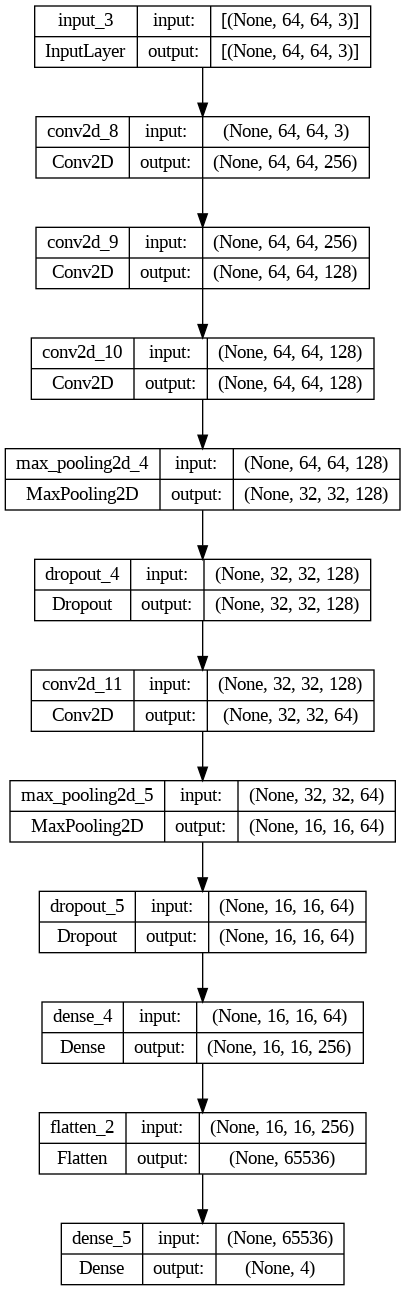

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

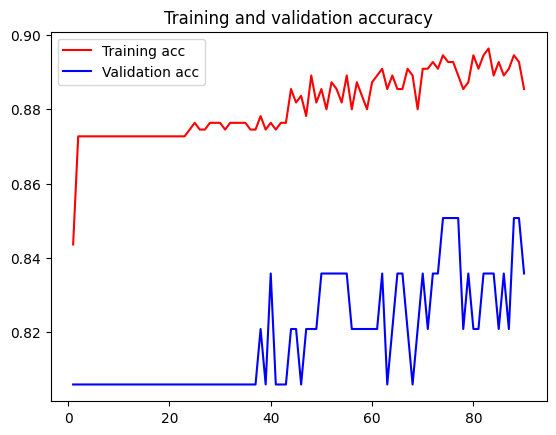

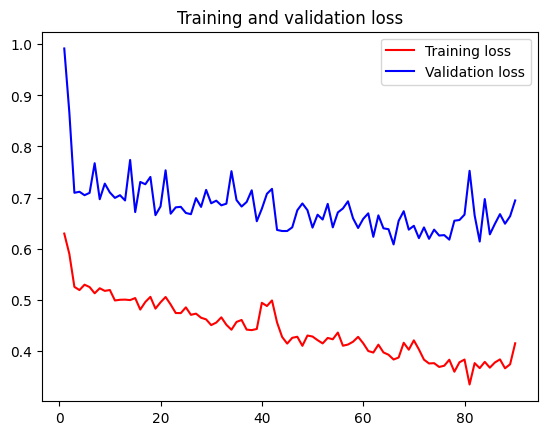

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

'aom': 0,
 'csom': 1,
 'earVentilationTube': 2,
 'earwax': 3,
 'foreignObjectEar': 4,
 'normal': 5,
 'otitisexterna': 6,
 'pseudoMembranes': 7,
 'tympanoskleros': 8

In [ ]:
# dir_path = '/content/drive/MyDrive/Multi_class_classification/validation'

# # img = image.load_img('/content/drive/MyDrive/ear_data/tympanic_membrane_dataset_2/test/abnormal/aom (11).png')
# # plt.imshow(img)

# {
#   'aom' : 0,
#   'csom': 1,
#  'earVentilationTube': 2,
#  'earwax': 3,
#  'foreignObjectEar': 4,
#  'normal': 5,
#  'otitisexterna': 6,
#  'pseudoMembranes': 7,
#  'tympanoskleros': 8}

# for i in os.listdir(dir_path):
#   img = image.load_img(dir_path+'//'+i, target_size=(64,64))
#   plt.imshow(img)
#   plt.show()

#   X = image.img_to_array(img)
#   X = np.expand_dims(X , axis = 0)
#   images = np.vstack([X])
#   val = model.predict(images)
#   print(i)
#   # if val == 0:
#   #   print("abnormal")
#   # else if:
#   #   print("normal")
#   if val.any() == 0:
#     print("aom")
#   elif val.any() == 1:
#     print("csom")
#   elif val.any() == 2:
#     print("earVentilationTube")
#   elif val.any() == 3:
#     print("earwax")
#   elif val.any() == 4:
#     print("foreignObjectEar")
#   elif val.any() == 5:
#     print("normal")
#   elif val.any() == 6:
#     print("otitisexterna")
#   elif val.any() == 7:
#     print("pseudoMembranes")
#   elif val.any() == 8:
#     print("tympanoskleros")
#   else:
#     print("Invalid class index")

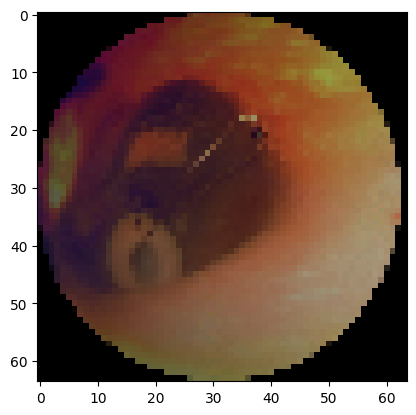

1/1 [==============================] - 0s 172ms/step
earVentilationTube (2).png
normal


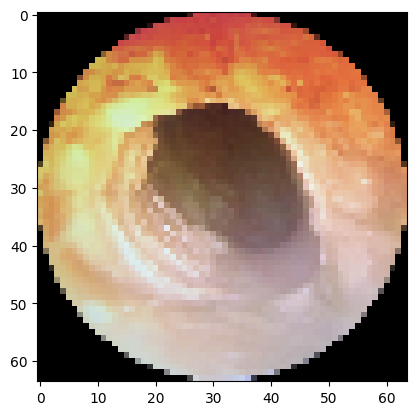

1/1 [==============================] - 0s 49ms/step
otitisexterna (26).png
normal


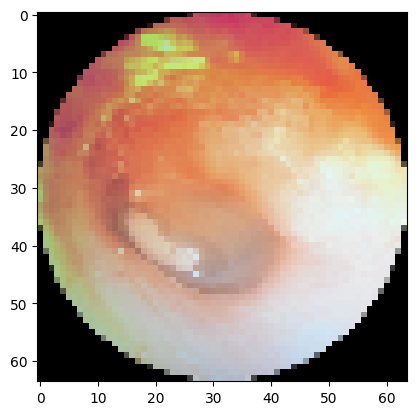

1/1 [==============================] - 0s 49ms/step
tympanoskleros (24).png
normal


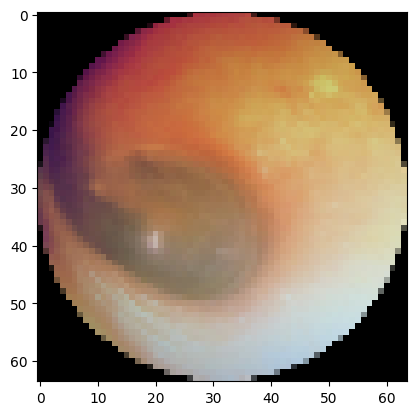

1/1 [==============================] - 0s 55ms/step
normal (440).png
normal


In [ ]:
dir_path = '/content/drive/MyDrive/Multi_class_classification/validation'

# {'earVentilationTube': 0,
#  'earwax': 1,
#  'normal': 2,
#  'otitisexterna': 3,
#  'pseudoMembranes': 4,
#  'tympanoskleros': 5}
{'earVentilationTube': 0, 'normal': 1, 'otitisexterna': 2, 'tympanoskleros': 3}

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(64,64))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X , axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  print(i)

  if val.any()==0:
    print("Earventilationtube")
  elif val.any()==1:
    print("normal")
  elif val.any()==2:
    print("otitisexterna")
  elif val.any()==3:
    print("tympanoskleros")
  # elif val.any()==4:
  #   print("pseudomembranes")
  # elif val.any()==5:
  #   print("tymponoskleros")


